# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="/data/code/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
print("Num brains: ", len(env.brain_names))
print(brain_name)
type(brain)
print(brain)

Num brains:  1
BananaBrain
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

The state space has 37 dimensions and contains:

- 7 rays projecting from the agent at the following angles: [20, 90, 160, 45, 135, 70, 110] # 90 is directly in front of the agent.
- Each ray is projected into the scene. If it encounters one of four detectable objects the value at that position in the array is set to 1. Finally there is a distance measure which is a fraction of the ray length: [Banana, Wall, BadBanana, Agent, Distance]
- The agent's velocity: Left/right velocity (usually near 0) and Forward/backward velocity (0-11.2)

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
# assert type(env_info.vector_observations) is list, "Observations is not a list!"
print(len(env_info.vector_observations))
print(type(env_info.vector_observations)) 
print(brain.vector_action_space_size)
# print(env_info.vector_observations)
# print (state)

1
<class 'numpy.ndarray'>
4


In [7]:
import time
from dqn_agent import Agent
from trackers import BananaTracker

episodes = 1000
checkpoint_file = 'checkpoint.pth'

tracker = BananaTracker(episodes)

agent = Agent(state_size=state_size, action_size=brain.vector_action_space_size, seed=0)
print ("Loading agent parameters from checkpoint: ", checkpoint_file)
agent.load(checkpoint_file)

episode_stats = [] # To keep track of: (episode #, score, +ves, -ves, ratio)

# Main loop:
print ("Starting the game...")
for i in range(episodes):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    
    # Starting episode
    print ("\tStarting episode {}".format(i))
    counter = 0
    while True:
        # Interaction:
        action = agent.act(state, eps=0.20)            # select an action. encourage agent to explore
                                                       #   20% of the time
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        agent.step(state=state, action=action, 
                   next_state=next_state, reward=reward, 
                   done=done)                          # send the reward and next state to the agent
        tracker.step(i, reward, done)

        # Update bookkeeping variables
        counter += 1
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if counter % 50 == 0:
            print ("\t\tStep {}: Action = {}, Reward = {} / {}, Done = {}, ".format(counter, action, reward, score, done))
        if done:                                       # exit loop if episode finished
            break
    #     time.sleep(1)
    print("Total score: {}".format(score))
    
print ("Saving parameters to checkpoint: ", checkpoint_file)
agent.save('checkpoint.pth')

!!! DEVICE ==> cuda:0 !!!
QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
Loading agent parameters from checkpoint:  checkpoint.pth
Starting the game...
	Starting episode 0
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 2.0, Done = True, 
Total score: 2.0
	Starting episode 1
		Step 50: Action = 1, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / -1.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / -1.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / -1.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / -1.0, Done = False

		Step 100: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 1.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 1.0, Done = True, 
Total score: 1.0
	Starting episode 21
		Step 50: Action = 1, Reward = 0.0 / -2.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / -1.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / -2.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / -1.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / -2.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / -2.0, Done = True, 
Total score: -2.0
	Starting episode 22
		Step 50: Action = 0, Reward = 0.0 / -1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 250: Action = 0, Reward = 0.

		Step 200: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 3.0, Done = True, 
Total score: 3.0
	Starting episode 42
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 43
		Step 50: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 6.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 44
		Step

		Step 300: Action = 0, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 63
		Step 50: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 0.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 0.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 / 1.0, Done = True, 
Total score: 1.0
	Starting episode 64
		Step 50: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 4.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 6.0, Done = True, 
Total score: 6.0
	Starting episode 65
		Step 50: Action = 1, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 0.0, Done = False, 
		Step 

		Step 50: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 3.0, Done = True, 
Total score: 3.0
	Starting episode 85
		Step 50: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 4.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 4.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 4.0, Done = True, 
Total score: 4.0
	Starting episode 86
		Step 50: Action = 3, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 2.0, 

		Step 150: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 106
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 4.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 4.0, Done = True, 
Total score: 4.0
	Starting episode 107
		Step 50: Action = 1, Reward = 0.0 / -1.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / -2.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / -1.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / -1.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 

		Step 150: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 / 1.0, Done = True, 
Total score: 1.0
	Starting episode 127
		Step 50: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 128
		Step 50: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 4.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 4.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 / 7.

		Step 250: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 1.0, Done = True, 
Total score: 1.0
	Starting episode 148
		Step 50: Action = 2, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 0.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 4.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 8.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 149
		Step 50: Action = 1, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 0.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / -1.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / -2.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / -1.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 / -1.0, Done = True, 
Total score: -1.0
	Starting episode 150
		Step 50: Action = 0, Reward = 0.0 / 2.0, Done = False, 

		Step 250: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 / 1.0, Done = True, 
Total score: 1.0
	Starting episode 169
		Step 50: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 1.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 / 2.0, Done = True, 
Total score: 2.0
	Starting episode 170
		Step 50: Action = 3, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 4.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 171
		Step 50: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		St

		Step 50: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 4.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 4.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 4.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 3.0, Done = True, 
Total score: 3.0
	Starting episode 191
		Step 50: Action = 3, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 192
		Step 50: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / -1.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 2.

		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 2.0, Done = True, 
Total score: 2.0
	Starting episode 212
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 4.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 / 6.0, Done = True, 
Total score: 6.0
	Starting episode 213
		Step 50: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 4.0

		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 4.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 233
		Step 50: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 3.0, Done = True, 
Total score: 3.0
	Starting episode 234
		Step 50: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 6.0

		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 254
		Step 50: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 8.0, Done = True, 
Total score: 8.0
	Starting episode 255
		Step 50: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 4.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 3.0

		Step 100: Action = 2, Reward = 0.0 / -1.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / -1.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 275
		Step 50: Action = 2, Reward = 0.0 / -1.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 0.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 6.0, Done = True, 
Total score: 6.0
	Starting episode 276
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 0.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 /

		Step 150: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 / 2.0, Done = True, 
Total score: 2.0
	Starting episode 296
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 297
		Step 50: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 4.

/data/code/deep-reinforcement-learning/p1_navigation/trackers.py:34: RuntimeWarning: invalid value encountered in double_scalars
  self.accuracies[episode] = 1.0 * self.positive_counts[episode] / (self.positive_counts[episode] + self.negative_counts[episode])


		Step 50: Action = 3, Reward = 0.0 / 6.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 7.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 9.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 / 11.0, Done = True, 
Total score: 11.0
	Starting episode 309
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 200: Action = 0, Reward = 1.0 / 6.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 310
		Step 50: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 3

		Step 50: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 2.0, Done = True, 
Total score: 2.0
	Starting episode 330
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 1.0, Done = True, 
Total score: 1.0
	Starting episode 331
		Step 50: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 2.0

		Step 100: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 6.0, Done = True, 
Total score: 6.0
	Starting episode 351
		Step 50: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 352
		Step 50: Action = 1, Reward = 0.0 / 4.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 7.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 7.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 8.

		Step 100: Action = 3, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 372
		Step 50: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 6.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 6.0, Done = True, 
Total score: 6.0
	Starting episode 373
		Step 50: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 2.

		Step 200: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 393
		Step 50: Action = 1, Reward = 0.0 / -1.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / -1.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / -1.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / -1.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / -1.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / -1.0, Done = True, 
Total score: -1.0
	Starting episode 394
		Step 50: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 3.0, Done = True, 
Total score: 3.0
	Starting episode 

		Step 200: Action = 3, Reward = 0.0 / 1.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 2.0, Done = True, 
Total score: 2.0
	Starting episode 414
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 2.0, Done = True, 
Total score: 2.0
	Starting episode 415
		Step 50: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 6.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 6.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 6.0, Done = True, 
Total score: 6.0
	Starting episode 416
		S

		Step 300: Action = 1, Reward = 0.0 / 6.0, Done = True, 
Total score: 6.0
	Starting episode 435
		Step 50: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 8.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 10.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 9.0, Done = True, 
Total score: 9.0
	Starting episode 436
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 5.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 8.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 9.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 9.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 9.0, Done = True, 
Total score: 9.0
	Starting episode 437
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		S

		Step 300: Action = 2, Reward = 0.0 / 12.0, Done = True, 
Total score: 12.0
	Starting episode 456
		Step 50: Action = 2, Reward = 1.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 4.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 457
		Step 50: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 7.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 458
		Step 50: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		

		Step 300: Action = 2, Reward = 0.0 / 1.0, Done = True, 
Total score: 1.0
	Starting episode 477
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 2.0, Done = True, 
Total score: 2.0
	Starting episode 478
		Step 50: Action = 0, Reward = 0.0 / -1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / -1.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / -1.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / -1.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / -1.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / -1.0, Done = True, 
Total score: -1.0
	Starting episode 479
		Step 50: Action = 2, Reward = 0.0 / -1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 1.0, Done = Fals

		Step 100: Action = 2, Reward = 0.0 / 0.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 1.0, Done = True, 
Total score: 1.0
	Starting episode 499
		Step 50: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 500
		Step 50: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 1.0 / 5.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 6.

		Step 200: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 8.0, Done = True, 
Total score: 8.0
	Starting episode 520
		Step 50: Action = 1, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 0.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 1.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 1.0, Done = True, 
Total score: 1.0
	Starting episode 521
		Step 50: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 8.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 8.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 / 10.0, Done = True, 
Total score: 10.0
	Starting episode 522
	

		Step 250: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 3.0, Done = True, 
Total score: 3.0
	Starting episode 541
		Step 50: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 6.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 542
		Step 50: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 6.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 10.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 11.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 13.0, Done = True, 
Total score: 13.0
	Starting episode 543
		Step 50: Action = 0, Reward = 0.0 / 3.0, Done = False, 


		Step 300: Action = 2, Reward = 0.0 / 15.0, Done = True, 
Total score: 15.0
	Starting episode 562
		Step 50: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 6.0, Done = True, 
Total score: 6.0
	Starting episode 563
		Step 50: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 7.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 8.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 8.0, Done = True, 
Total score: 8.0
	Starting episode 564
		Step 50: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 4.0, Done = False, 
		

		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 6.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 584
		Step 50: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 8.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 9.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 12.0, Done = True, 
Total score: 12.0
	Starting episode 585
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 4.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 5

		Step 150: Action = 1, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 1, Reward = 1.0 / 6.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 10.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 12.0, Done = True, 
Total score: 12.0
	Starting episode 605
		Step 50: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 4.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 6.0, Done = True, 
Total score: 6.0
	Starting episode 606
		Step 50: Action = 2, Reward = 0.0 / 4.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 5.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 9.0, Done = False, 
		Step 250: Action = 0, Reward = 1.0 / 16.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 

		Step 200: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 8.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 10.0, Done = True, 
Total score: 10.0
	Starting episode 626
		Step 50: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 8.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 10.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 11.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 12.0, Done = True, 
Total score: 12.0
	Starting episode 627
		Step 50: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 4.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 8.0, Done = True, 
Total score: 8.0
	Starting episode 6

		Step 300: Action = 0, Reward = 0.0 / 3.0, Done = True, 
Total score: 3.0
	Starting episode 647
		Step 50: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 8.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 9.0, Done = True, 
Total score: 9.0
	Starting episode 648
		Step 50: Action = 3, Reward = 0.0 / 4.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 9.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 10.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 10.0, Done = True, 
Total score: 10.0
	Starting episode 649
		Step 50: Action = 1, Reward = 0.0 / -1.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / -1.0, Done = False, 

		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 8.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 / 10.0, Done = True, 
Total score: 10.0
	Starting episode 669
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 2, Reward = 1.0 / 8.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 9.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 10.0, Done = True, 
Total score: 10.0
	Starting episode 670
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 /

		Step 50: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 1.0 / 4.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 9.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 11.0, Done = True, 
Total score: 11.0
	Starting episode 690
		Step 50: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 691
		Step 50: Action = 2, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 0.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 3

		Step 150: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 5.0, Done = True, 
Total score: 5.0
	Starting episode 711
		Step 50: Action = 2, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 8.0, Done = True, 
Total score: 8.0
	Starting episode 712
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 6.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 6.

		Step 150: Action = 0, Reward = 0.0 / 8.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 12.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 12.0, Done = False, 
		Step 300: Action = 1, Reward = 0.0 / 16.0, Done = True, 
Total score: 16.0
	Starting episode 732
		Step 50: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 200: Action = 3, Reward = 1.0 / 11.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 11.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 12.0, Done = True, 
Total score: 12.0
	Starting episode 733
		Step 50: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 2, Reward = 

		Step 150: Action = 2, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 3, Reward = 1.0 / 9.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 9.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 11.0, Done = True, 
Total score: 11.0
	Starting episode 753
		Step 50: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 11.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 14.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 18.0, Done = True, 
Total score: 18.0
	Starting episode 754
		Step 50: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 4.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 4.0, Done = False, 
		Step 300: Action = 2, Reward = 0.

		Step 250: Action = 2, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 8.0, Done = True, 
Total score: 8.0
	Starting episode 774
		Step 50: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 7.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 9.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 9.0, Done = True, 
Total score: 9.0
	Starting episode 775
		Step 50: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 9.0, Done = True, 
Total score: 9.0
	Starting episode 776
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		St

		Step 50: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 8.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 10.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 12.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 13.0, Done = True, 
Total score: 13.0
	Starting episode 796
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 7.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 797
		Step 50: Action = 3, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 /

		Step 50: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 9.0, Done = True, 
Total score: 9.0
	Starting episode 817
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 6.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 9.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 13.0, Done = True, 
Total score: 13.0
	Starting episode 818
		Step 50: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 1.0 / 4.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 9

		Step 150: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 9.0, Done = True, 
Total score: 9.0
	Starting episode 838
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 1, Reward = 0.0 / 7.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 8.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 10.0, Done = True, 
Total score: 10.0
	Starting episode 839
		Step 50: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 9.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 10.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 11.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 

		Step 200: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 859
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 5.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 10.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 / 12.0, Done = True, 
Total score: 12.0
	Starting episode 860
		Step 50: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 1, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 9.0, Done = True, 
Total score: 9.0
	Starting episode 861


		Step 250: Action = 0, Reward = 0.0 / 8.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 11.0, Done = True, 
Total score: 11.0
	Starting episode 880
		Step 50: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 3, Reward = 0.0 / 8.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 8.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 8.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 8.0, Done = True, 
Total score: 8.0
	Starting episode 881
		Step 50: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 6.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 9.0, Done = True, 
Total score: 9.0
	Starting episode 882
		Step 50: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		

		Step 50: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 200: Action = 0, Reward = 1.0 / 9.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 10.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 12.0, Done = True, 
Total score: 12.0
	Starting episode 902
		Step 50: Action = 3, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 4.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 / 8.0, Done = True, 
Total score: 8.0
	Starting episode 903
		Step 50: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 

		Step 150: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 923
		Step 50: Action = 0, Reward = 0.0 / 0.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 7.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 9.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 11.0, Done = True, 
Total score: 11.0
	Starting episode 924
		Step 50: Action = 3, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 5.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 5.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 / 

		Step 200: Action = 1, Reward = 0.0 / 10.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 10.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 10.0, Done = True, 
Total score: 10.0
	Starting episode 944
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 250: Action = 2, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 9.0, Done = True, 
Total score: 9.0
	Starting episode 945
		Step 50: Action = 3, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 1, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 8.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 11.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 12.0, Done = True, 
Total score: 12.0
	Starting episode 

		Step 150: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 7.0, Done = False, 
		Step 250: Action = 1, Reward = 0.0 / 7.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 7.0, Done = True, 
Total score: 7.0
	Starting episode 965
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 3.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 / 4.0, Done = True, 
Total score: 4.0
	Starting episode 966
		Step 50: Action = 2, Reward = 0.0 / 2.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 4.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 7.0, Done = False, 
		Step 200: Action = 3, Reward = 0.0 / 8.0, Done = False, 
		Step 250: Action = 3, Reward = 0.0 / 9.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 / 10

		Step 250: Action = 0, Reward = 0.0 / 8.0, Done = False, 
		Step 300: Action = 0, Reward = 0.0 / 11.0, Done = True, 
Total score: 11.0
	Starting episode 986
		Step 50: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 100: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 150: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 200: Action = 2, Reward = 0.0 / 1.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 1.0, Done = False, 
		Step 300: Action = 3, Reward = 0.0 / 2.0, Done = True, 
Total score: 2.0
	Starting episode 987
		Step 50: Action = 3, Reward = 0.0 / 3.0, Done = False, 
		Step 100: Action = 0, Reward = 0.0 / 2.0, Done = False, 
		Step 150: Action = 0, Reward = 0.0 / 5.0, Done = False, 
		Step 200: Action = 0, Reward = 0.0 / 6.0, Done = False, 
		Step 250: Action = 0, Reward = 0.0 / 8.0, Done = False, 
		Step 300: Action = 2, Reward = 0.0 / 10.0, Done = True, 
Total score: 10.0
	Starting episode 988
		Step 50: Action = 0, Reward = 0.0 / 1.0, Done = False, 


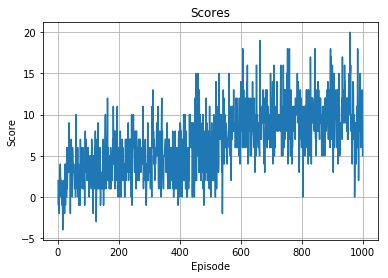

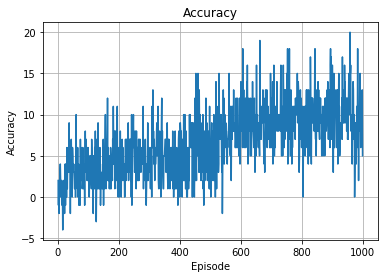

In [8]:
from trackers import BananaTracker

# tracker.plot_step_counts()
tracker.plot_scores()
tracker.plot_accuracies()

When finished, you can close the environment.

In [ ]:
env.close()